### K-Mean Clustering

### Customer Shopping Latest trend

In [1]:
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter
# Load the latest version of the dataset
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "bhadramohit/customer-shopping-latest-trends-dataset",
    path="shopping_trends.csv",
)
df.head()

d:\Projects\DS_BootCamp\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\hp\AppData\Local\Temp\ipykernel_6228\2380653880.py:5: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
df.shape

(3900, 19)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,44.068462,15.207589,18.0,31.00,44.0,57.00,70.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
Review Rating,3900.0,3.749949,0.716223,2.5,3.10,3.7,4.40,5.0
Previous Purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0


In [5]:
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [6]:
df.describe(include="O")

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Preferred Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Credit Card,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,696,675,2223,2223,677,584


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [34]:
X = df[['Purchase Amount (USD)', 'Age']]


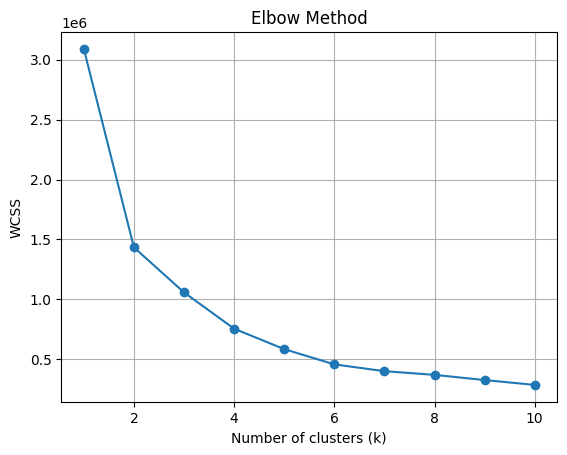

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []  # Within-cluster sum of squares

# Try different k values
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [39]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [9]:
df['Gender'].value_counts()

Gender
Male      2652
Female    1248
Name: count, dtype: int64

In [ ]:
# Is there a particular season when demand increases significantly
pivot_check = df.pivot_table(values='Customer ID', index='Season', aggfunc='count')
pivot_check

,Customer ID
Season,
Fall,975
Spring,999
Summer,955
Winter,971


In [11]:
pd.crosstab(df["Season"], df["Payment Method"])

Payment Method,Bank Transfer,Cash,Credit Card,Debit Card,PayPal,Venmo
Season,,,,,,
Fall,157,156,183,172,155,152
Spring,181,170,178,150,155,165
Summer,156,159,155,154,164,167
Winter,138,163,180,157,164,169


In [12]:
# Do clothes sell higher than accessories?
pivot_category = df.pivot_table(index="Category", values="Purchase Amount (USD)", aggfunc="mean")
pivot_category

,Purchase Amount (USD)
Category,
Accessories,59.838710
Clothing,60.025331
Footwear,60.255426
Outerwear,57.172840


In [14]:
pd.crosstab(df["Gender"], df["Category"])

Category,Accessories,Clothing,Footwear,Outerwear
Gender,,,,
Female,392,556,199,101
Male,848,1181,400,223


In [15]:
# Is there a relationship between the payment method and the average spending amount?
# Which payment method is used the most
pivot_payment = df.pivot_table(index="Payment Method", values="Purchase Amount (USD)", aggfunc=["count", "mean"])
pivot_payment

,count,mean
,Purchase Amount (USD),Purchase Amount (USD)
Payment Method,,
Bank Transfer,632,58.738924
Cash,648,59.927469
Credit Card,696,61.159483
Debit Card,633,58.638231
PayPal,638,58.697492
Venmo,653,61.241960


In [16]:
pd.crosstab(df["Payment Method"],df["Purchase Amount (USD)"])

Purchase Amount (USD),20,21,22,23,24,25,26,27,28,29,...,91,92,93,94,95,96,97,98,99,100
Payment Method,,,,,,,,,,,,,,,,,,,,,
Bank Transfer,6,9,14,15,5,13,10,7,10,11,...,6,9,9,9,8,13,8,5,6,5
Cash,10,6,6,13,4,8,7,6,6,9,...,11,5,10,7,6,10,9,9,10,8
Credit Card,14,8,8,5,10,6,9,6,8,8,...,12,7,5,17,10,9,6,9,14,7
Debit Card,10,6,5,9,11,9,8,6,9,11,...,6,6,5,8,7,6,17,14,5,7
PayPal,4,5,5,9,14,7,9,7,10,9,...,6,4,6,6,8,5,6,8,8,6
Venmo,8,12,6,6,6,13,8,8,8,8,...,10,7,11,15,12,10,9,7,9,3


In [17]:
# How can each age group be targeted more efficiently
df["Age Group"] = pd.cut(df["Age"], bins=[18, 30, 45, 60, 75], labels=["18-30", "31-45", "46-60", "61-75"])
pivot_age = df.pivot_table(index="Age Group", values="Previous Purchases", aggfunc="mean")
pivot_age

C:\Users\hp\AppData\Local\Temp\ipykernel_6228\2669127860.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_age = df.pivot_table(index="Age Group", values="Previous Purchases", aggfunc="mean")


,Previous Purchases
Age Group,
18-30,25.113636
31-45,24.918573
46-60,25.767401
61-75,26.055325


C:\Users\hp\AppData\Local\Temp\ipykernel_6228\3054605735.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Discount Applied", y="Review Rating", palette="pastel")


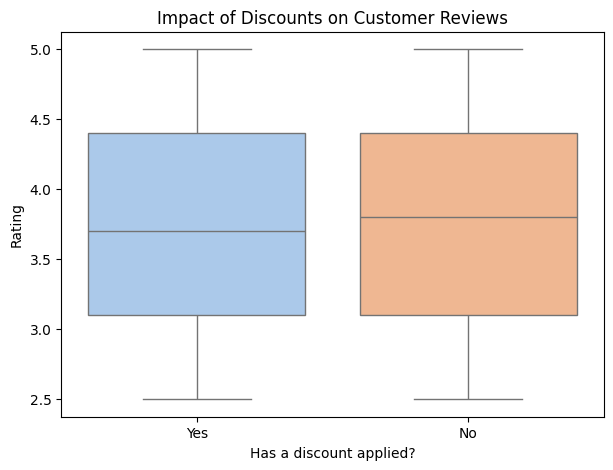

In [19]:
# Is there a clear difference between products that haven't received a discount?
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x="Discount Applied", y="Review Rating", palette="pastel")
plt.title("Impact of Discounts on Customer Reviews")
plt.xlabel("Has a discount applied?")
plt.ylabel("Rating")
plt.show()

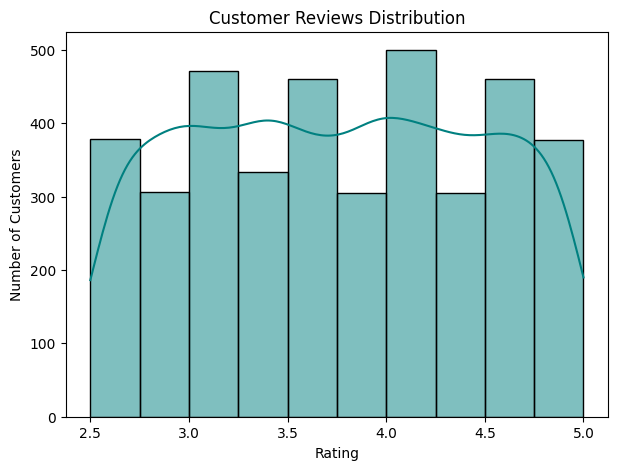

In [20]:
# Are most reviews positive or negative?
plt.figure(figsize=(7, 5))
sns.histplot(df["Review Rating"], bins=10, kde=True, color="teal")
plt.title("Customer Reviews Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Customers")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_6228\480937386.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Age Group", y="Purchase Amount (USD)", palette="magma", estimator=sum)


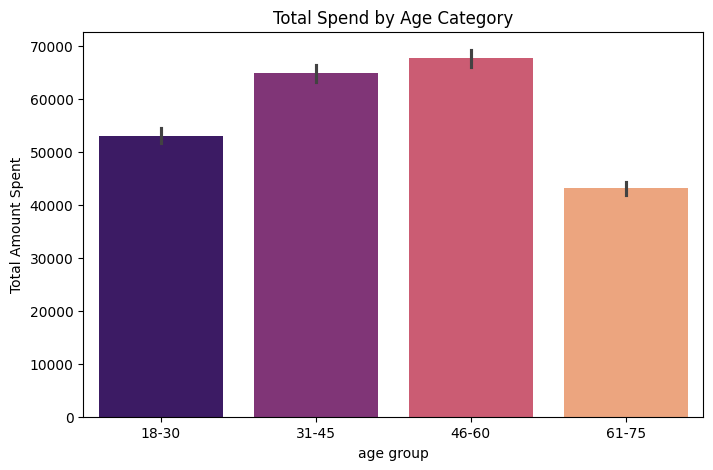

In [21]:
# Which age groups spend the most?

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="Age Group", y="Purchase Amount (USD)", palette="magma", estimator=sum)
plt.title("Total Spend by Age Category")
plt.xlabel("age group")
plt.ylabel("Total Amount Spent")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_6228\239728962.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Category", palette="coolwarm", order=df["Category"].value_counts().index)


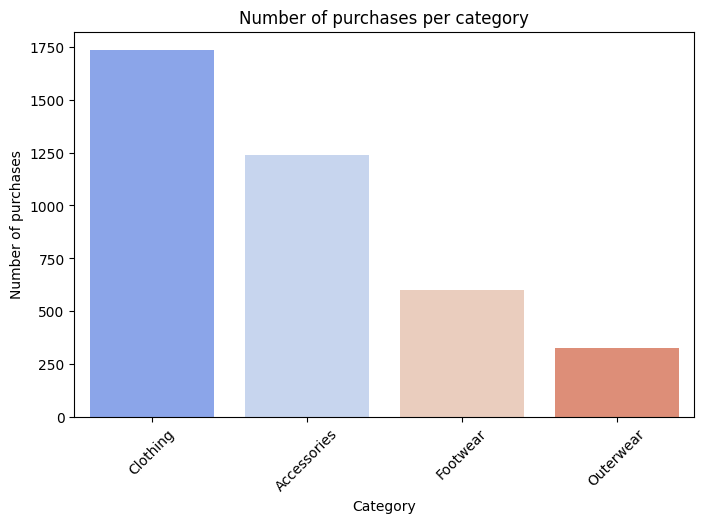

In [22]:
# Is there a category that clearly excels in purchasing?

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Category", palette="coolwarm", order=df["Category"].value_counts().index)
plt.title("Number of purchases per category")
plt.xlabel("Category")
plt.ylabel("Number of purchases")
plt.xticks(rotation=45)
plt.show()

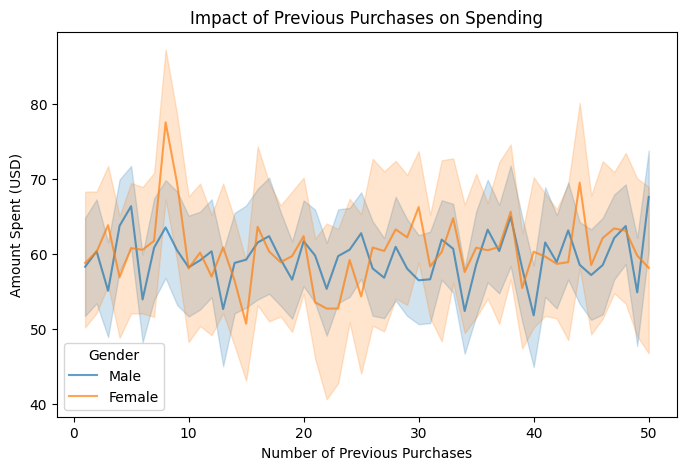

In [26]:
# Do customers with previous purchases spend more?
# Is there a difference between men and women in the buying pattern?

plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x="Previous Purchases", y="Purchase Amount (USD)", hue="Gender", alpha=0.7)
plt.title("Impact of Previous Purchases on Spending")
plt.xlabel("Number of Previous Purchases")
plt.ylabel("Amount Spent (USD)")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_6228\2585327942.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette="viridis")
d:\Projects\DS_BootCamp\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


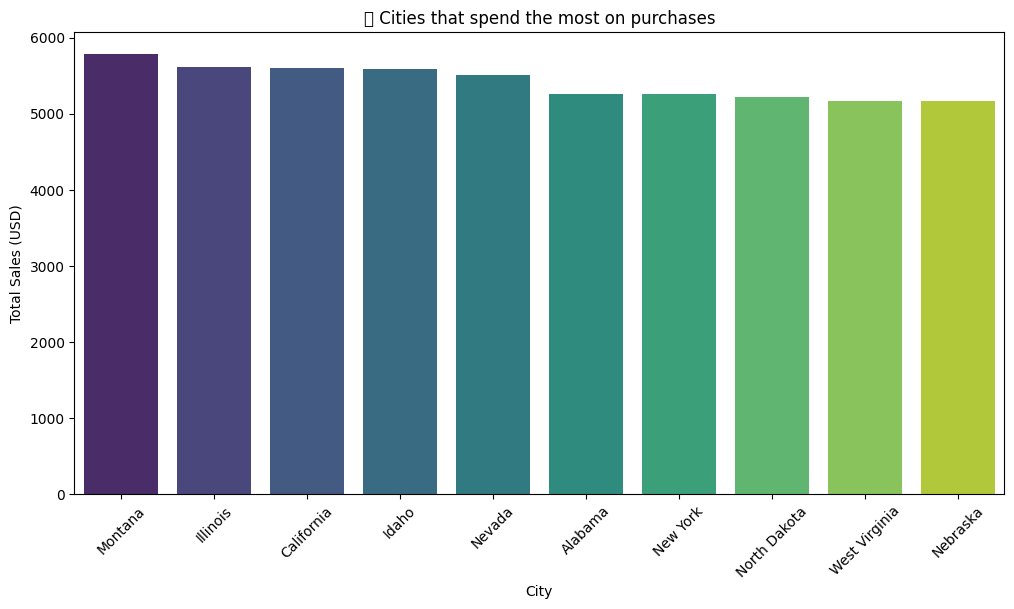

In [27]:
# To see which cities sell the most by total amount spent
plt.figure(figsize=(12, 6))
top_cities = df.groupby("Location")["Purchase Amount (USD)"].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top_cities.index, y=top_cities.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("🔝 Cities that spend the most on purchases")
plt.xlabel("City")
plt.ylabel("Total Sales (USD)")
plt.show()

In [28]:
catCols = []

for col in df.columns:
    if df[col].dtype == 'object' or df[col].nunique() <= 2:
        n = len(pd.unique(df[col]))
        catCols.append(col)
        #print col name and its unique categorical values
        print(col, "-", n, "unique values \n", df[col].unique(), "\n")
        cat_df = df[catCols]
cat_df = cat_df.drop(columns=['Item Purchased','Location','Color'])

Gender - 2 unique values 
 ['Male' 'Female'] 

Item Purchased - 25 unique values 
 ['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers' 'Shirt' 'Shorts' 'Coat'
 'Handbag' 'Shoes' 'Dress' 'Skirt' 'Sunglasses' 'Pants' 'Jacket' 'Hoodie'
 'Jewelry' 'T-shirt' 'Scarf' 'Hat' 'Socks' 'Backpack' 'Belt' 'Boots'
 'Gloves'] 

Category - 4 unique values 
 ['Clothing' 'Footwear' 'Outerwear' 'Accessories'] 

Location - 50 unique values 
 ['Kentucky' 'Maine' 'Massachusetts' 'Rhode Island' 'Oregon' 'Wyoming'
 'Montana' 'Louisiana' 'West Virginia' 'Missouri' 'Arkansas' 'Hawaii'
 'Delaware' 'New Hampshire' 'New York' 'Alabama' 'Mississippi'
 'North Carolina' 'California' 'Oklahoma' 'Florida' 'Texas' 'Nevada'
 'Kansas' 'Colorado' 'North Dakota' 'Illinois' 'Indiana' 'Arizona'
 'Alaska' 'Tennessee' 'Ohio' 'New Jersey' 'Maryland' 'Vermont'
 'New Mexico' 'South Carolina' 'Idaho' 'Pennsylvania' 'Connecticut' 'Utah'
 'Virginia' 'Georgia' 'Nebraska' 'Iowa' 'South Dakota' 'Minnesota'
 'Washington' 'Wisconsin' 'Michig

<Axes: ylabel='count'>

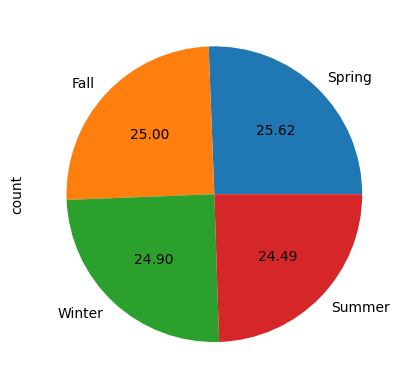

In [29]:
df['Season'].value_counts().plot(kind='pie', autopct='%1.2f')

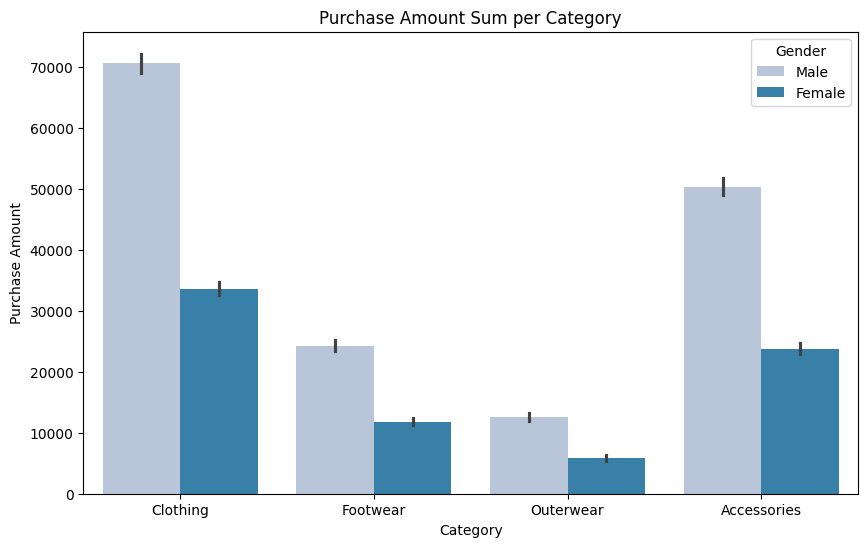

In [31]:
# How does the total purchase amount differ between different categories based on gender?

import numpy as np
plt.figure(figsize = (10,6))
sns.barplot(df, x = 'Category', y = 'Purchase Amount (USD)', hue= 'Gender', palette = 'PuBu', estimator = np.sum)
plt.title("Purchase Amount Sum per Category")
plt.xlabel("Category")
plt.ylabel("Purchase Amount")

plt.show()